In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Train three Support Vector Machine (SVM) Models with different kernels

# Initialize StandardScaler to normalize feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVM models with various kernel types
models = {
    "Linear": SVC(kernel="linear"),
    "Polynomial (deg=3)": SVC(kernel="poly", degree=3),
    "RBF": SVC(kernel="rbf")
}

trained_models = {}

# Train each SVM model using the scaled training data
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

In [ ]:
# Calculate and display performance metrics: Accuracy, Precision, Recall, and F1 Score
for name, model in trained_models.items():
    # Make predictions on the scaled test set
    y_pred = model.predict(X_test_scaled)

    # Print performance metrics for each kernel
    print(f"\n{name} Kernel Performance")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))


Linear Kernel Performance
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Polynomial (deg=3) Kernel Performance
Accuracy : 0.9
Precision: 0.9230769230769231
Recall   : 0.9
F1 Score : 0.89769820971867

RBF Kernel Performance
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613


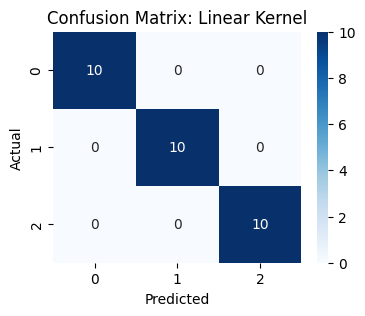

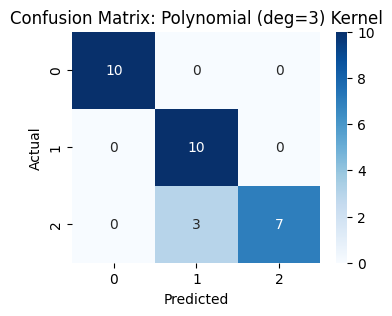

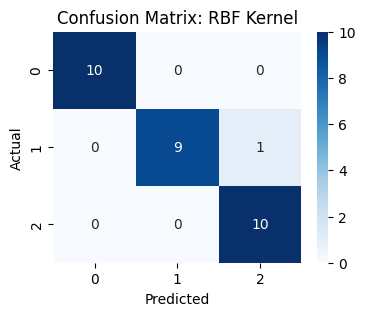

In [ ]:
# Generate and display Confusion Matrices for each SVM model
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in trained_models.items():
    # Make predictions on the scaled test set
    y_pred = model.predict(X_test_scaled)
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix: {name} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Analyze the Effect of Feature Scaling on SVM using the Breast Cancer Dataset

# A) Load the Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# B) Train an SVM (RBF Kernel) with and without feature scaling

# Case 1: Train SVM without feature scaling
# Split data into training and testing sets (70-30 split)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and train SVM with RBF kernel
svm_no_scale = SVC(kernel="rbf")
svm_no_scale.fit(X_train1, y_train1)

# Evaluate training and testing accuracy for the unscaled model
train_acc_no_scale = svm_no_scale.score(X_train1, y_train1)
test_acc_no_scale = svm_no_scale.score(X_test1, y_test1)

In [ ]:
# Case 2: Train SVM with StandardScaler applied
# Initialize StandardScaler and apply it to the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Initialize and train SVM with RBF kernel on scaled data
svm_scaled = SVC(kernel="rbf")
svm_scaled.fit(X_train2, y_train2)

# Evaluate training and testing accuracy for the scaled model
train_acc_scaled = svm_scaled.score(X_train2, y_train2)
test_acc_scaled = svm_scaled.score(X_test2, y_test2)

In [ ]:
# Print and compare the results for SVM models trained with and without scaling
print("\nSVM WITHOUT Scaling")
print("Training Accuracy:", train_acc_no_scale)
print("Testing Accuracy :", test_acc_no_scale)

print("\nSVM WITH Scaling")
print("Training Accuracy:", train_acc_scaled)
print("Testing Accuracy :", test_acc_scaled)


SVM WITHOUT Scaling
Training Accuracy: 0.8994974874371859
Testing Accuracy : 0.935672514619883

SVM WITH Scaling
Training Accuracy: 0.9874371859296482
Testing Accuracy : 0.9707602339181286
